<a href="https://colab.research.google.com/github/anubhavgupta1/Deep-Learning-Using-TensorFlow/blob/master/3_Tensor_Flow_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 67kB/s 
     |████████████████████████████████| 12.2MB 37.4MB/s 
     |████████████████████████████████| 573kB 44.4MB/s 
     |████████████████████████████████| 3.3MB 39.3MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: pandas 1.1.4 has requirement num

In [2]:
import numpy as np
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from __future__ import division, print_function, unicode_literals
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

#**Feeding data to the training algorithm**

##**Placeholder Nodes**

In [4]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
C = B*2
C

<tf.Tensor 'mul:0' shape=(?, 3) dtype=float32>

In [5]:

with tf.Session() as sess:
    B_val_1 = C.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = C.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2)

[[12. 14. 16.]]
[[18. 20. 22.]
 [24. 26. 28.]]


###**Mini-batch Gradient Descent**

In [6]:
reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape

housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

In [7]:
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [8]:
#Let's implement mini-batch using placeholder nodes

reset_graph()

learning_rate = 0.01

# Let's make X and y as placeholder nodes

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [9]:
# Define the batch size and compute the total number of batches
# Define function to fetch batch

n_epochs = 50

batch_size = 100
m = housing.target.shape[0]
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index) 
    indices = np.random.randint(m, size=batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1, 1)[indices]
    return X_batch, y_batch

In [10]:
fetch_batch(1,1,3)

(array([[ 1.        , -0.43635204,  0.50539419, -0.55697891, -0.03498224,
          0.39253765,  0.14136418, -0.80147053,  0.67867026],
        [ 1.        ,  0.6177724 , -1.87834817,  0.36763443,  0.05194415,
          1.9820333 ,  0.01268926,  0.99636589, -0.93352196],
        [ 1.        ,  0.07465565,  1.85618152, -0.42575976, -0.28273636,
         -0.39337964, -0.06093361, -0.56737725, -0.07501712]]), array([[1.173],
        [1.948],
        [2.61 ]]))

In [11]:
# This is execution phase
# Fetch the mini-batches one by one then provide the value of x and y via the feed_dict parameter

erros = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if epoch % 100 == 0:
                to, msev = sess.run([training_op, mse], feed_dict={X: X_batch, y: y_batch})
                erros.append(msev)
            else:
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    best_theta = theta.eval()
print(best_theta)

[[ 2.0552728 ]
 [ 0.8222201 ]
 [ 0.11761488]
 [-0.25223717]
 [ 0.3240065 ]
 [ 0.01295398]
 [-0.04279911]
 [-0.90302294]
 [-0.8782436 ]]


In [12]:
msev

0.48148742

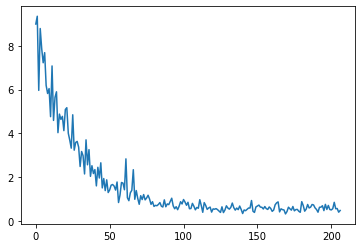

In [13]:
plt.plot(erros)
plt.show()